In [11]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]

N = 20
d0 = 2
C = 3

X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1)) 
  #r = np.linspace(j, j, N) + np.random.randn(N)*0.15# radius
  #t = np.linspace(0, 2 * np.pi, N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.random.multivariate_normal(means[j], cov, N).T
  y[ix] = j

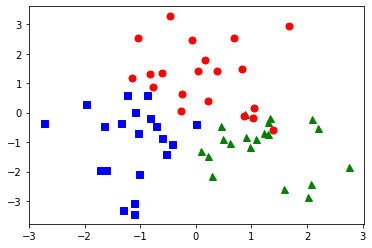

In [20]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
plt.show()

In [21]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [30]:
## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# cost or loss function  
def cost(Y, Yhat):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

def R(Weight):
    l2_Cost = 0
    
    for i in range(Weight.shape[0]):
        for j in range(Weight.shape[1]):
            l2_Cost += Weight[i, j] ** 2
    
    return  l2_Cost

In [31]:
d0 = 2
d1 = h = 200 # size of hidden layer 
d2 = C = 3
# initialize parameters randomely 
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# X = X.T # each column of X is a data point 
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

print("Initial Solution Completed!!!")
print("Backpropagation")

Initial Solution Completed!!!
Backpropagation


In [32]:
for it in range(10000):
    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    
    Yhat = softmax(Z2)
    Loss = cost(Y, Yhat) + R(W1) + R(W2)
    
    if it % 1000 == 0:
        print("iter: {},  R_Loss: {}".format(it, Loss))
    
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T) + 0.1 * W2
    db2 = np.sum(E2, axis = 1, keepdims = True) + 0.1 * b2
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU 
    dW1 = np.dot(X, E1.T) + 0.1 * W1
    db1 = np.sum(E1, axis = 1, keepdims = True) + 0.1 * b1
    
    # Gradient Descent update
    W1 -= eta*dW1 
    b1 -= eta*db1 
    W2 -= eta*dW2
    b2 -= eta*db2

Z1 = np.dot(W1.T, X) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % acc)

iter: 0,  R_Loss: 1.190451745689286
iter: 1000,  R_Loss: 5.873375117120638
iter: 2000,  R_Loss: 5.873286139370851
iter: 3000,  R_Loss: 5.873411555286756
iter: 4000,  R_Loss: 5.873305071566187
iter: 5000,  R_Loss: 5.87344003372554
iter: 6000,  R_Loss: 5.87325961687327
iter: 7000,  R_Loss: 5.87350119441199
iter: 8000,  R_Loss: 5.873259984909577
iter: 9000,  R_Loss: 5.873359376485709
training accuracy: 91.67 %


In [33]:
print("Visualize Data")
print("Visualize Result")

Visualize Data
Visualize Result


(1, 57600)
20


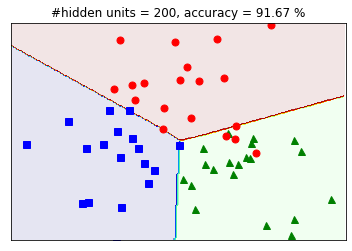

In [34]:
xm = np.arange(-3, 3, 0.025)
xlen = len(xm)
ym = np.arange(-3, 3, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(W1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# X = X.T
N = 20
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()